In [29]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import copy
from random import random
from matplotlib.colors import ListedColormap
import matplotlib.patches as mPatches
import time
import random


In [30]:
# Initiliaze population

# 0: Resting
# 1: Sharing
# 2: Bored

def initialiazePopulation(N: int):

    # Create population
    population = np.zeros((1, N), dtype=int)


    # Pick two random people
    randomPeople = random.sample(range(1, N), 2)

    # Set one to sharing
    population[0, randomPeople[0]] = 1

    # And the other one to bored
    population[0, randomPeople[1]] = 2

    return population

In [31]:
# Update the state
def updatePopulation(population, p, q, r):

    # Create new state
    newState = copy.deepcopy(population)

    # Loop over whole population
    for i in range(len(population[0])):

        # Resting rule
        if population[0, i] == 0 and random.random() <= p:
            # Resting becomes sharing
            newState[0, i] = 1
            continue

        # Sharing rule
        if population[0, i] == 1 and random.random() <= q:

            # Pick random person
            randomPerson = random.sample(range(1, N), 1)

            # If that person is resting the they will now become a sharer
            if population[0, randomPerson] == 0:
                newState[0, randomPerson] = 1
                continue

            # However, if the person they pick is bored, then the sharer will lose interest and become bored too.
            elif population[0, randomPerson] == 2:
                newState[0, i] = 2
                continue
            
            # Else the person is sharing and we do nothing
            else:
                continue

        # Bored rule
        if population[0, i] == 1 and random.random() <= r:

            # Pick random person
            randomPerson = random.sample(range(1, N), 1)

            # If that person is resting then the bored person will now become resting
            if population[0, randomPerson] == 0:
                newState[0, i] = 0

            # Otherwise they will continue to be bored.
            else:
                newState[0, i] = 2

    return newState

In [35]:
# Plotting

# Color maps
cmap = ListedColormap(["white", "green", "red"])
resting_patch = mPatches.Patch(color="white", label="Resting")
sharing_patch = mPatches.Patch(color="green", label="Sharing")
boring_patch = mPatches.Patch(color="red", label="boring")

# Function for plotting
def plotPopulation(population, title):
    plt.figure(1)
    plt.title(title)
    plt.legend(handles=[boring_patch, sharing_patch, resting_patch], loc="lower left")
    plt.imshow(population, vmin=0, vmax=len(cmap.colors), cmap=cmap)
    plt.yticks(color="w")
    plt.show()

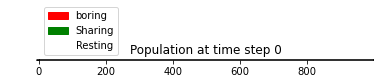

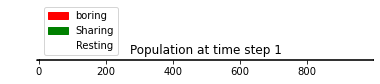

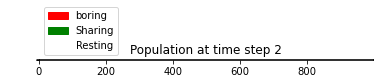

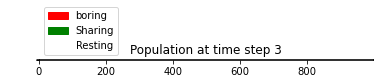

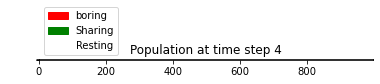

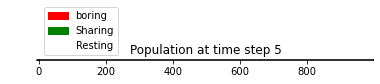

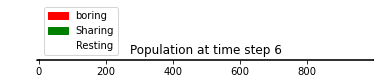

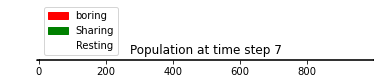

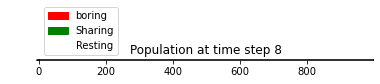

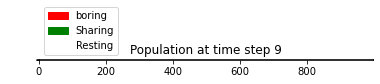

In [38]:
# Run simulations

# Initialize population
N = 1000
population = initialiazePopulation(N)


# Set simulation parameters:
p = 0.001
q = 0.01
r = 0.01
numberOfSimulations = 10


for i in range(numberOfSimulations):
    population = updatePopulation(population, p, q, r)
    plotPopulation(population, f"Population at time step {i}")
    plt.pause(.5)
